# Exercice 1

    Given:
       x, y, z: a point of interest in three dimensional space
       sigma, r, b: parameters defining the lorenz model
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz model's partial
           derivatives at the point x, y, z
    


<b style='color:red;'>Correct.</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import traceback
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")


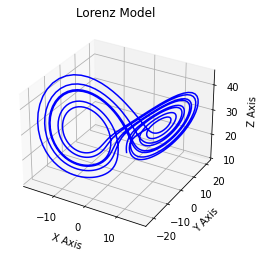

In [4]:


def Lorenz_func(x, y, z, sigma=10, r=28, b=8/3):#Lorenz function
    
    x_dot = sigma*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 1e-2
num_steps = 1000

# Need one more for the initial values
x = np.empty(num_steps + 1)
y = np.empty(num_steps + 1)
z = np.empty(num_steps + 1)

# Set initial values
x[0], y[0], z[0] = (8., 0., 30.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = Lorenz_func(x[i], y[i], z[i])
    x[i + 1] = x[i] + (x_dot * dt)
    y[i + 1] = y[i] + (y_dot * dt)
    z[i + 1] = z[i] + (z_dot * dt)


# 3-dimensional plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(x, y, z, lw=1.5,c="b")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Model")

plt.show()

# 4-stage Runge-Kutta of Lorenz model
<b style='color:red;'>Correct.</b>

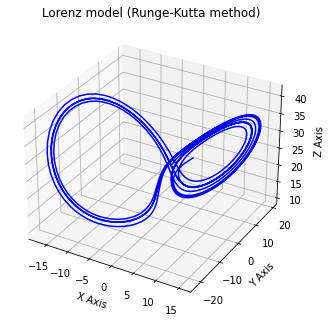

In [5]:

class Lorenz_Model_RungeKutta:
    DT            = 1e-2     # Differential interval
    STEP          = 1000   # Time step count
    X_0, Y_0, Z_0 = 8, 0, 30  # Initial values of x, y, z

    def __init__(self):
        self.res = [[], [], []]

    def exec(self):
        """ Lorenz model (Runge-Kutta method) execution """
        try:
            xyz = [self.X_0, self.Y_0, self.Z_0]
            for _ in range(self.STEP):
                k_1 = self.__lorenz(xyz)
                k_2 = self.__lorenz([
                    x + k * self.DT / 2 for x, k in zip(xyz, k_1)
                ])
                k_3 = self.__lorenz([
                    x + k * self.DT / 2 for x, k in zip(xyz, k_2)
                ])
                k_4 = self.__lorenz([
                    x + k * self.DT for x, k in zip(xyz, k_3)
                ])
                for i in range(3):
                    xyz[i] += (k_1[i] + 2 * k_2[i] + 2 * k_3[i] + k_4[i]) \
                            * self.DT / 6.0
                    self.res[i].append(xyz[i])
            self.__plot()
        except Exception as e:
            raise

    def __lorenz(self, xyz, p=10, r=28, b=8/3.0):
        
        try:
            return [
                -p * xyz[0] + p * xyz[1],
                -xyz[0] * xyz[2] + r * xyz[0] - xyz[1],
                xyz[0] * xyz[1] - b * xyz[2]
            ]
        except Exception as e:
            raise

    def __plot(self):
       
        try:
            fig = plt.figure()
            ax = Axes3D(fig)
            ax.set_xlabel("X Axis")
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            ax.set_title("Lorenz model (Runge-Kutta method)")
            ax.plot(self.res[0], self.res[1], self.res[2], color="blue", lw=1.5)
            plt.show()
        except Exception as e:
            raise


if __name__ == '__main__':
    try:
        obj = Lorenz_Model_RungeKutta()
        obj.exec()
    except Exception as e:
        traceback.print_exc()
        sys.exit(1)